<img src="https://nds.iaea.org/relnsd/images/iaea.PNG" style="float:left; border-radius:6px">
<div style="margin-top:10px;font-size:22pt;font-weight:bold;">&nbsp;&nbsp; NDLab
    <div style="font-size:14pt; font-weight:normal; padding-left:100px;margin-bottom:-10px;margin-top:-10px">Beta Version </div>
<!--span style="font-size:16pt; font-weight:normal"> version 0</span-->
</div>


<br>
<b>The aim of this tutorial is to show how to query, extract data, and plug them in Pyhton tools and custom code</b> 
<br>
There are some examples of analysing and plotting data, but it is up to the user
to search the web for tutorials on data analisys, pattern recognition, machine learning, ...
<br><br>


<b>To install NDLab:</b><br>
   go to the <a href="https://github.com/IAEA-NDS/NDLab">GitHub page</a> and read the *How to install* section


In some examples this Notebook makes use of two external packages: pandas and plotly.
You can of course use NDLab without them, they just make plotting easier.
<br>
<b>To install plotly</b>:
```    
    $ pip install plotly
    $ pip install ipywidgets
    $ jupyter labextension install jupyterlab-plotly
```
<b>To install pandas:</b>

```
    $ pip install pandas
```

(You will have to restart jupyer lab)


# This tutorial has two parts: #
- <b> 1<sup>st</sup> -  Work with data </b> <br>deals with extraction, analysis, plotting, and exporting of the data
- <b> 2<sup>nd</sup> -  Write you own code </b> <br>deals with functions for writing code and building algorithms, like decay energy balance, decay chains, etc...


Let's start importing NDLab:

In [1]:
# NuclearDataLab
import ndlab as nl

# this is needed only for using autocompletion when typing
from ndlaborm import * 


<div class="alert alert-block alert-success" style="font-size:18pt; font-weight:bold">
    
 1<sup>st</sup> - Work with data
    
   </div>

Just type the properties you want. For example, if you need the nuclide charge radius, type **`NUCLIDE.CHARGE_RADIUS`**    

<div class="alert alert-block alert-info" style="padding:0px; color:rgb(80,80,80)">
    <b>Practice</b><br>
Use the autofilling to see what is availabe: start typing 'NU' and hit the tab key to load NUCLIDE, then add '.', to see all the  fields.<br>
    For the moment no code will be run, it is just to test the input method
</div> 


Here the list of **entites** one can query <br>
**`NUCLIDE, LEVEL, GAMMA, L_DECAY, CUM_FY, IND_FY`** <br>plus the set of decay radiations:<br>
**`DR_ALPHA, DR_GAMMA, DR_BETAM, DR_BETAP, DR_ANTI_NU, DR_NU, DR_X, DR_ANNHIL, DR_AUGER, DR_CONV_EL, DR_DELAYED, DR_PHOTON_TOTAL`**

<!-- Each entity has a set of quantities, like **`LEVEL.ENERGY`**, or **`DR_ALPHA.INTENSITY`**, ...-->
<div class="alert alert-block alert-info" style="padding:0px; color:rgb(80,80,80)">
    <b>Practice</b><br>
Try the autofilling with some of entities to see what they provide.<br>
For the moment no code will be run, it is just to test the input method
</div> 

<div class="alert alert-block alert-success">
    <b>Entities can  have links to other entities</b>
    <br>
    For example `GAMMA.START_LEVEL` gives access to the start level of the gamma, and if you type `GAMMA.START_LEVEL.ENERGY` you will refer to its energy

   </div>


In the picture below the fields providing the links are in green - to nuclide, and red - to level.
<div><img src='../docs/_static/ndlab_rel.png' width=800></div>

<div class="alert alert-block alert-info" style="padding:0px; color:rgb(80,80,80)">
<b>Practice 1</b><br> Try to reach the J of a level that decays emitting beta radiation (DR_BETA)
    <br><br>
     to see the solution, go to the bottom cell
</div> 

<div class="alert alert-block alert-info" style="padding:0px; color:rgb(80,80,80)">
<b>Practice 1</b><br> Try to reach the angular momentum J of a level that decays emitting beta radiation (DR_BETA)
    <br><br>
     to see the solution, go to the cell at the very bottom
</div> 

<div class="alert alert-block alert-info" style="padding:0px; color:rgb(80,80,80)">
    <b>Practice</b><br>
use print(description(NUCLIDE)), or any of the other names, to get the details the available fields and links
    
<br><br>
<b>Note</b>:
    <br>
- (Q) tells that there are also the _UNC and _LIMIT fields. For example SP, SP_UNC, SP_LIMIT 
<br>    
- (q) tells that there is the _UNC field. For example ABUNDANCE, ABUNDANCE_UNC
<br>
- (S) tells that the fields is a string. For example NUCID, or JP   
</div>

In [ ]:
print(description(NUCLIDE))


<div class="alert alert-block alert-success" style="font-size:12pt; font-weight:bold">
    1.1 &nbsp; How to build a data request ... 
</div>
You will be using the grammar above to get the data. <br>
You need to specify what <b>fields</b> to retrieve and what <b>filter</b>, if any, applies. <br>
For example to get all the energies of the &gamma;-rays that start from a level with J<sup>&pi;</sup> = 2 <sup>+</sup>
<br>

`fields = " GAMMA.ENERGY "`
<br>
`filter = " GAMMA.START_LEVEL.JP = '2+' "`


The filter can be empty, but that in some cases can lead to a lengthy retrieval

<div class="alert alert-block alert-warning" style="padding:0px; color:rgb(80,80,80)">
    <b>Attention:</b> <br>Enclose the <em>fields</em> and <em>filter</em> between double commas "  " <br><br>To take advantage of the autofilling, first write everything without commas, then place them when you are ready.
    <br>This happens in a notebook, whilst on command line and other developing environments the autofilling works also within commas
</div>

<div class="alert alert-block alert-success" style="font-size:12pt; font-weight:bold">
 ... and get the data
</div>

The simplest way to retrieve data is to call the **`nl.csv_data(fields, filter)`** function, or the **`nl.json_data(fields, filter)`** function

<div class="alert alert-block alert-info" style="padding:0px; color:rgb(80,80,80)">
<b>Practice 2</b><br> use the fields and filter variable above to call the csv_data function (place it in a print to have a nicer display), then try the json_data function
    <br><br>
    to see the solution, go to the bottom cell
</div> 



In [ ]:
fields = "GAMMA.ENERGY"
filter = "GAMMA.START_LEVEL.JP = '2+'"
# print only the beginning
print(nl.json_data(fields, filter)[0:100])

<div class="alert alert-block alert-warning" style="padding:6px; color:rgb(80,80,80)">
    <b> Some  rules</b>: <br><br>
    <b>1) Only one entity</b><br>
    In a list of fields, you must use the same entity: <br>
    fields = "NUCLIDE.Z, GAMMA.ENERGY" is <b>not</b> allowed, use instead<br>
    fields = "GAMMA.NUC.Z, GAMMA.ENERGY"
    <br><br>
    <b>2) Two dots max</b><br>
    Do not use more than 2 dots: <br>
    DR_BETA<span style="font-weight:bold;font-size:16pt;color:red">.</span>DAUGHTER_FED_LEVEL<span style="font-weight:bold;font-size:16pt;color:red">.</span>NUC<span style="font-weight:bold;font-size:16pt;color:red">.</span>ABUNDANCE is <b>not</b> allowed: 3 dots. <br>
    Often you can do the same with 2 dots, in this case<br>
    DR_BETA<span style="font-weight:bold;font-size:16pt">.</span>DAUGHTER<span style="font-weight:bold;font-size:16pt">.</span>ABUNDANCE
     <br><br>
    <b>3) Multiple fields</b><br>
    must be seperated by comma
     <br><br>
    <b>4) Multiple conditions</b><br>
    Use the logical operators <b>and</b> , <b>or</b> 
     to join conditions in the filter. Matematical operators are <b>=  >  &lt;   &#37; </b>
    <br> In general, one can use <b>SQL</b> operators allowed by SQLite
   <br><br>
    <b> Tips:</b><br>
    
    You can build <b>functions</b> with the fields:<br>
        fields = "GAMMA.MIXING_RATIO / GAMMA.ENERGY"
        <br>
        <br>
    You can give <b>alias</b> for convenience<br>
        fields = "GAMMA.MIXING_RATIO / GAMMA.ENERGY <b>as m</b>"
        
        
   
   
</div>


<div class="alert alert-block alert-success" style="font-weight:bold">
<b> A complex example</b>
</div>    
Let's consider this picture from <a href="https://journals.aps.org/prc/abstract/10.1103/PhysRevC.10.1197?ft=1#fulltext">K. S. Krane Phys. Rev. C 10, 1197 (1974) </a>
    <br>
 <div>
    <img src='../docs/_static/krane.png' style='height:600px;float:left; margin-right:20px'>
           <br><br><br> 
    <b>Nuclide</b> : Z even, N even <br><br>
 **-------------------** <b>Start level</b>: Jp = 2+  &nbsp; &nbsp; (2<sup>nd</sup>occurrence)<br>
&nbsp; &nbsp;&darr;<br>
&nbsp; &nbsp;&darr; &nbsp; &nbsp;&nbsp; &nbsp; <b>Gamma</b>:  &nbsp;  E2 + M1 multipolarity<br>
&nbsp; &nbsp;&darr;<br>
 **-------------------** <b>End level</b>: Jp = 2+  &nbsp; &nbsp; (1<sup>st</sup>occurrence)
    <br><br><br>
    <b>Filter criteria</b> <br>
 - gammas from even-even nuclides<br>
 - starting from the second Jp = 2+ level<br>
 - ending at first Jp = 2+ level<br>
 - having E2+M1 multipolarity<br>
 
    <b>Fields</b><br> 
 - &Delta; =  | mixing ratio / energy |  * 835 ,  and A
 <br><br>

</div>

<div class="alert alert-block alert-info" style="padding:0px; ">
<b>Practice 3</b><br> Retrieve the data to reproduce the picture
    <br>
    The "fields" variable, and the first condition of the "filter", are already given. <br><br>
    - Remember the <b>and</b> to join conditions <br> - Use the autofilling and then add <b>"</b> at the beginning and at the end
    <br><br>
    to see the solution go to the cell at the very bottom
</div> 



<div class="alert alert-block alert-warning" style="padding:6px; color:rgb(80,80,80)">
    <b> How to specify conditions</b>
    <br>
    Condition on text fields must be placed within commas <b>'</b>:
    <br>
    GAMMA.START_LEVEL.JP = <b>'2+'</b> 
    <br><br>
    Condition on numeric fields do not have commas:
    <br>
    GAMMA.ENERGY > <b> 2000</b> 
    <br><br>
    In case of doubt, use print(description(GAMMA)) to see the field type
    
    <div>

In [ ]:

fields = "GAMMA.NUC.Z as z, GAMMA.NUC.N as n , abs( GAMMA.MIXING_RATIO / GAMMA.ENERGY / 0.835 * 1000) as m"

filter  = "( GAMMA.NUC.Z % 2 = 0 ) and ( GAMMA.NUC.N % 2 = 0 ) " # gamma from even-even nuclides
filter += " and GAMMA.START_LEVEL.JP = '2+' and GAMMA.START_LEVEL.JP_ORDER = 2 "# starts from Jp = 2+ , 2nd occurrence
filter +=    # ends at     Jp = 2+ , 1st occurrence
filter +=    # E2 + M1 multipolarity


print(nl.csv_data(fields, filter)[0:250])

<div class="alert alert-block alert-success" style="font-size:14pt; font-weight:bold">
 1.2 &nbsp; Plotting 
</div>    

So far only
     the <b>NDLab</b> package has been used, this is enough to retrieve data and export them in <b>CSV</b> or <b>Json</b>
    <br>
    What follows shows how to embed <b>NDLab</b> in <b>Pandas</b> and <b>Plotly</b> 
   

Run the cell below which loads the packages and defines a convenience function
    


In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

# Plotly
import plotly.graph_objects as go
import plotly.express as px
   

<br>
The Y axis of the Krane's picture above needs  Log(&Delta;).
Using <b>pandas</b>, <b>numpy</b>, and <b>matplotlib </b> data are prepared and plotted.

With  `fields`  and `filter` of the above practice, the following cell loads the data and shows part of the dataframe

In [ ]:
fields = " GAMMA.NUC.Z as z, GAMMA.NUC.N as n, abs( GAMMA.MIXING_RATIO / GAMMA.ENERGY / 0.835 * 1000 ) as y "   # z, n, mixing / energy

filter  = "(GAMMA.NUC.Z % 2 = 0 ) AND (GAMMA.NUC.N % 2 = 0 ) "   # even-even nuclides
filter += " and GAMMA.START_LEVEL.JP = '2+' and GAMMA.START_LEVEL.JP_ORDER = 2 "# starts from Jp = 2+ , 2nd occurrence
filter += " and GAMMA.END_LEVEL.JP = '2+' and GAMMA.END_LEVEL.JP_ORDER = 1 "   # ends at     Jp = 2+ , 1st occurrence
filter += " and ( GAMMA.MULTIPOLARITY = 'E2+M1' or  GAMMA.MULTIPOLARITY = 'M1+E2' )" # E2 + M1 multipolarity

# load the data into a dataframe
df = nl.pandas_df(fields, filter, pd)
df


Now the data are plotted by calculating  Z + N for the x, and log(&Delta;) the the y

In [ ]:
plt.scatter( df["z"] + df["n"],  np.log(df["y"])*10, color='red' )


It is worth to superimpose the new data with the old ones

In [ ]:
plt.subplots(figsize=(28, 10))
plt.scatter(   df["z"] + df["n"],  np.log(df["y"])*10, color='red')
plt.imshow(mpimg.imread("../docs/_static/krane_2.png"), extent=[38, 205, -63, 79])

The paper claims that there are minima at closed shells<br>
On a 2D plot it is difficult to see where the closed shells in N or Z  are placed<br>
The cell below uses plotly to plot a 3D picture where nuclides with closed shells are in red:<br>
- A second dataset is loaded with only the closed shells by adding a condition to the filter
- The first and second dataset are plotted togeter

Plotly graphs are interactive, can be rotated and zoomed

In [ ]:
# condition for closed-shell 
filter2 = filter + " and ( GAMMA.NUC.Z  in (2,8,20,28,50,82,126) or GAMMA.NUC.N in (2,8,20,28,50,82,126) )"

# load data
df2 = nl.pandas_df(fields, filter2, pd)

# plot 3D
fig = go.Figure(data=[
    # all nuclides
    go.Scatter3d(
        x=df["z"], y=df["n"], z=np.log10(df.y)*10, 
        mode='markers', marker=dict(size=8, color='blue')
    )
 ,   
    # the magic ones in red
    go.Scatter3d(
        x=df2["z"], y=df2["n"], z=np.log10(df2.y)*10, 
        mode='markers',marker=dict(size=8,color="red")
    )
  
])

# set layout properties
fig.update_layout(margin=dict(l=0, r=0, b=30, t=0) ,width=800, height=800,    
                  scene = dict(xaxis_title='Z',yaxis_title='N',zaxis_title='Delta') 
                 ).show()


<br><br>
Once you have a dataframe, you can export into anything
 <code>
  df.to_csv()
  df.to_json()
  df.to_hdf()
  df.to_excel()  
  df.to_sql()
  df.to_xml()
 </code>
<div class="alert alert-block alert-warning" style="padding:6px; color:rgb(80,80,80)">
    <b>Note</b>: do not focus on the format, the <b>format does not matter</b>. Focus instead on the data model, the <b> data model matters</b>
</div>

<div class="alert alert-block alert-success" style=" font-weight:bold">
Performance test 
</div>    
Get the energy distribution of the entire set of gamma transitions:<br>  The following steps are performed with a couple lines of code

 * 260 000 gamma lines in the db are taken, 
 * a condition on each line is applied, 
 * the results are ordered, 
 * the results are binned, 
 * an interactive plot is shown
 

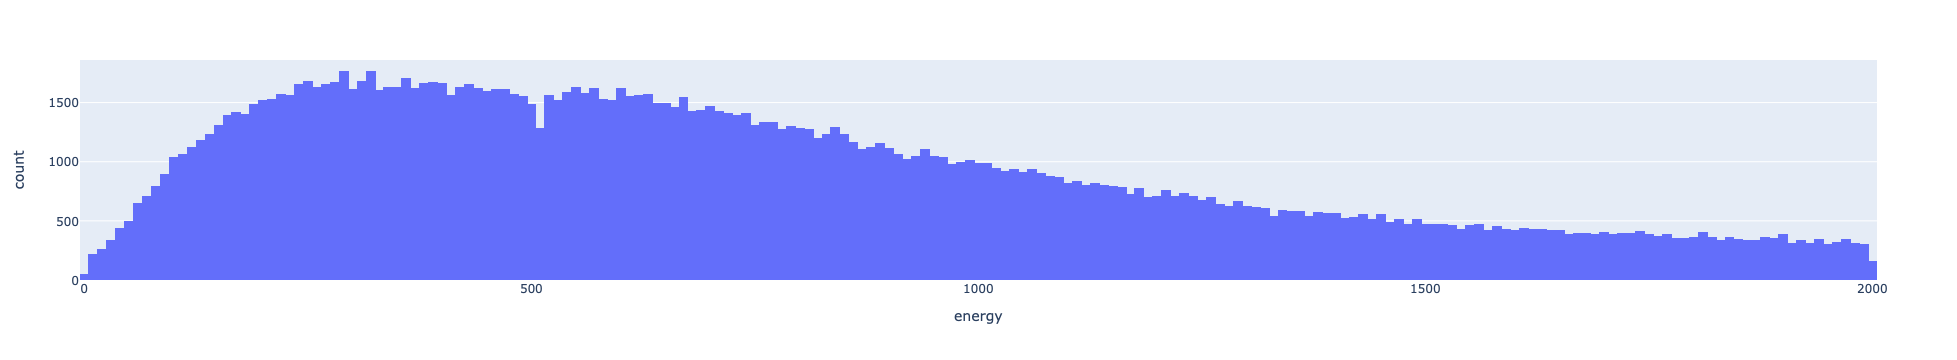

In [14]:
fields =    "GAMMA.ENERGY as energy"
condition = "GAMMA.NUC.Z < 80 and  GAMMA.NUC.Z > 0 and GAMMA.ENERGY < 2000"

dfg =  nl.pandas_df(fields,condition,pd)

px.histogram( dfg,  x="energy", nbins=200).show()


<div class="alert alert-block alert-info" style="padding:6px; color:rgb(80,80,80)">
Look at the binning above, is there anything relevant for clinical imaging of PET nuclides ? 
    </div>

<div class="alert alert-block alert-success" style="font-size:17pt;font-weight:bold">
     1.3 &nbsp; Data analysis
    </div>


The picture above relies on your brain to find patterns and outliers, whilst
the cell below shows how to automatise the process.
    <br>
    The assumption is that the curve should be smooth, meaning that the first dervative should not have sudden jumps.
<br>
    Comments in cell explain the steps 


In [ ]:
fields =    "GAMMA.ENERGY as energy"
condition = "GAMMA.ENERGY BETWEEN 0 AND 2000"

# load a pandas dataframe using the convenience funtion defined above
a =  nl.pandas_df(fields,condition,pd)

# bin the data (consult the web for further examples and explanations)
dft = pd.cut(a[a.columns[0]], bins=300).apply(lambda x: x.mid).value_counts(sort=False).to_frame()
dft = dft.rename(columns={"energy": "counts"})

# get the derivative
dft["delta"] = abs(dft.diff(periods = 1).counts )

# visualise the outlier (consult the web to check Plotly tools for data processing)
fig = px.box(dft, y=dft.delta).show()

# print the energy where the outlier occurs
print("Outlier energy ", dft.index[dft.index.get_loc(dft.delta.idxmax()) - 1 ])




<div class="alert alert-block alert-success">
A few examples of data retrieval with filter to conclude part one of the tutorial
</div>

<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
     1.3.1 &nbsp; Plot log_ft values grouped by transition type
    </div>



In the plot the transition type is not decoded: 1NU stands for 1<sup>st</sup> non-unique, etc...

In [ ]:
fields = "DR_BETA.TRANS_TYPE as t , DR_BETA.LOGFT as l"
filter = " DR_BETA.LOGFT != 0" # this is just to avoid empty values

df =  nl.pandas_df(fields, filter,pd)

# group by transition type
ans = [pd.DataFrame(y) for x, y in df.groupby(df.columns[0], as_index=False)]


# plot log_ft for each transition type 
fig = go.Figure()
for a in ans:
    tst = pd.cut(a['l'], bins=125).apply(lambda x: x.mid).value_counts(sort=False)
    fig.add_trace(go.Scatter(x=tst.index.values, y = tst, mode="markers",name=a.iloc[0, 0]))

fig.update_layout(width=800, height=400, xaxis_range=[3,11] ).show()




<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
    1.3.2 &nbsp; Plot log ft for allowed transitions form a parent level with Jp = '0+' 
    </div>

In [ ]:
fields =  " DR_BETA.LOGFT as log_ft"
filter =  "( DR_BETA.PARENT_LEVEL.JP = '0+') and DR_BETA.TRANS_TYPE ='A'"

df = nl.pandas_df(fields, filter, pd)

px.histogram(df, x=df.log_ft, nbins=80).update_layout(width=350, height=350).show()


<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
  1.3.3 &nbsp; Extract level information for all even-even nuclei with the first excited state is <b>NOT</b> 2+.
    </div>



With pandas it is easy to dump the data in <b>almost any format</b>. In this way one is then free to use them as input for other tools
<br>
Check the web for how to use the various writing - reading methods listed below
 

In [ ]:

filter = ("LEVEL.NUC.N % 2 = 0 AND LEVEL.NUC.Z % 2 = 0 AND LEVEL.SEQNO = 1 AND LEVEL.JP != '2+' AND LEVEL.JP_METHOD = JP_STRONG ")
 
df = nl.pandas_df_nl(nl.levels(filter), pd)

df


<div class="alert alert-block alert-success" style="font-size:18pt;font-weight:bold">
 2<sup>nd</sup> - Functions and programming
    </div>

Often one wants to write had hoc processing code that differs from filtering, grouping, binning, or any other manipulation.
For example, calculate the energy balance of a decay.

**Ndlab** provides as a set of python classes and functions pushing the data extraction to the background. The functions accept the *filter* parameter (default no filter) to restrict the selection.
    
    
<div class="alert alert-block alert-warning" style="padding:6px; color:rgb(80,80,80)">
    <b>Note</b>:  Only the <b>NDLab</b> packages are needed in the following.
    One needs Pandas or Plotly just when using a dataframe or a plot
    <br><br>
    <b>Warning</b>: the filter can refer only to the entity retrieved: dr_gammas(" DR_GAMMA.ENERGY > 2000 ") 
    
    <br><br>
    <b>Tip</b>: use the remove_doublers function incase teh selection returns double entries :
    
    <br>
 <code>
     delayed_n = nl.dr_delayeds( "DR_DELAYED.TYPE = DELAY_N ")
     parent_nucs = [ ld.parent for ld in delayed_n]
     parent_nucs = nl.remove_doublers(parent_nucs)</code>
    <br>
    Whitout this call, a parent emitting many neutron will appear multiple times
</div>    

The following is a list of hands-on examples. To see the full list of classes and function, please consult the GUIDE

<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
  2.1 &nbsp; Decay energy balance
    </div>

With NDLab's set of classes and functions, you do not need to take care of the data retrieval.
See how you can calculate the energy balance of a decay.
Stop the video to check the code...

In [3]:
# Decay energy balance: quality assessment of the data
filter = ""

# load a nuclide using its identifier
nuc = nl.nuclide("73SE") 


# the decays() function loads an array with all the decays. Take the first one
decay = nuc.decays[0]

# all possible radiation types for the chosen decay
rads = [
        decay.xs(),          # X-ray
        decay.gammas(),      # Gamma
        decay.convels(),     # Conversion electron
        decay.augers(),      # Auger
        decay.alphas(),      # Alpha
        decay.betas_m(),     # B-
        decay.betas_p(),     # B+
        decay.anti_nus(),    # anti-neutrino
        decay.nus(),         # neutrino
        decay.annihil()     # annihilation
       ]

# measured energy for each radiation type
rads_en = [(sum([r[i].energy * r[i].intensity for i in range(len(r))])) for r in rads]

# total measured energy
tot_en = sum(rads_en) / 100

# intensities are per 100 decay of the parent, need to renormalise Q with branching ratio
q_br = decay.q_togs * decay.perc/100

# difference with deposited energy
delta = ((q_br - tot_en)/q_br)*100

print("Branching Ratio:          ", decay.perc/100 )
print("Energy accounted for [keV]" , tot_en )
print("Qb- * B.R. [keV]          " , q_br)
print("Delta [%]                  " , int(delta.value * 100) /100)
print("\nNotice the built-in uncertainty propagation")

Branching Ratio:            1.0+/-0
Energy accounted for [keV] CA 2725+/-17
Qb- * B.R. [keV]            2725+/-8
Delta [%]                   0.0

Notice the built-in uncertainty propagation


<br>
<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
   2.2 &nbsp;Ancestors - offsprings chain 
    </div>


In [ ]:

nuc = nl.nuclide("135CS") 

print('Daughters and H-l [s]')
[print(d.nucid, d.gs.half_life_sec) for d in nuc.daughters]
    

print('\nParents and H-l [s]')
[print(d.nucid, d.gs.half_life_sec) for d in nuc.parents]
    


<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
  2.3 &nbsp; Level population fraction after a gamma cascade
    </div>
    
Let's say that the level #15 of Xe-135 is populated by some reaction.

The following code gives the list of the levels populated by the gamma cascade, with energy and intensity     

In [ ]:
def cascade( my_level):
        global todo
        global levels
        global done
        
         
        for g in my_level.gammas() : 
            
            if(g.end_level.l_seqno != 0 and not (g.end_level.l_seqno in todo)):
                todo[g.end_level.l_seqno] = g.end_level
            
            if not g.end_level.l_seqno in result: 
                result[g.end_level.l_seqno] = result[my_level.l_seqno] * g.rel_photon_intens/100      
            else:
                result[g.end_level.l_seqno] += result[my_level.l_seqno] * g.rel_photon_intens/100         
        
        if not my_level.l_seqno in done: 
            done.append(my_level.l_seqno)
            
        todo = dict(sorted(todo.items(), reverse=True))  
        
        myrun = todo.copy()
       
        for r in myrun:
            if( not r in done):
                cascade(levels[r])

        return 



nuc_id = "135XE"
start_level = 15

levels = nl.nuclide(nuc_id).levels() 
result = {start_level : 1.0}
todo = {start_level : levels[start_level] }
done = []

cascade(levels[start_level])

# just printing
line = '|'.join(str(x).ljust(24) for x in [ "energy [keV] ", " population %", "level #"])
print(line +'\n')
for k in sorted(result):
    line = '|'.join(str(x).ljust(24) for x in [str(levels[k].energy ), str(result[k]*100.0),levels[k].pk])
    print(line)
  


<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
  2.4 &nbsp;Photon total intensities 
    </div>

Nuclides often have many decay modes, either because of metastable states or because of a single energy state has more branchings

In gamma spectroscopy it is useful to have the total intensity of an energy line in the decay of a parent, regardless of the decay mode

The cell below selects Eu-152 and calls the `dr_photon_total` function which performs the task. Note that the function is called with a filter which cuts intensityes less than 2%

In [ ]:


df = nl.pandas_df_nl(nl.nuclide("152EU").decays[0].dr_photon_tot("DR_PHOTON_TOTAL.INTENSITY > 2"), pd)

go.Figure().add_trace(go.Scatter(x=df['energy'], y = df['intensity'], mode = "markers")).update_layout(xaxis_title='Energy [keV]',
yaxis_title='Intensity [%]').show()

df

<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
  2.5 &nbsp; Ground states Half-lives as function of N and Z
    </div>


See that one can refer to a column in a dataframe by its position, in this way one has a template to plot 3d

In [ ]:

# convenience function to plot 3D
def plot3d(fields, condition):
    df =  nl.pandas_df(fields,condition, pd)

    fig = go.Figure(data=[
    
    go.Scatter3d(
        x=df[df.columns[0]], y = df[df.columns[1]], z = df[df.columns[2]],
        mode='markers', marker=dict(size=8, color='blue') )

    ])

    fig.update_layout(height=1000 ,scene=dict(zaxis=dict( type='log'))).show()
    return df

fields =    "LEVEL.NUC.Z , LEVEL.NUC.N , LEVEL.HALF_LIFE_SEC"
condition = "LEVEL.ENERGY = 0"

plot3d(fields, condition)    


<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
  2.6 &nbsp; Half-life of nuclides with 10 < Z < 100, emitting delayed neutrons after beta- decay
    </div>

In [ ]:

fields = "DR_DELAYED.PARENT.Z , DR_DELAYED.PARENT.N , DR_DELAYED.PARENT_LEVEL.HALF_LIFE_SEC"
condition = "DR_DELAYED.TYPE = 'DN' and DR_DELAYED.PARENT.Z > 10 and DR_DELAYED.PARENT.Z < 100"

plot3d(fields, condition)


<div class="alert alert-block alert-success" style="font-size:13pt;font-weight:bold">
  2.7 &nbsp; Half-life of nuclides in the decay chain of Am-241
    </div>

For each nuclide, the properties `daughters_chain` and `parents_chain` contain the offstrings and the ancestors, respectively

The example shows the seamless interplay between sets of NDLab classes and pandas dataframes 

In [ ]:
# get the offsprings as NDLab class instances
dau = [n.gs for n in nl.nuclide("241AM").daughters_chain]

# dump in a dataframe
df = nl.pandas_df_nl(dau,pd)

# Plot. Hover on a point to see more info
px.scatter(df, 
           x= df.index, 
           y= df.half_life_sec,
           hover_data=["nucid"],
           labels={ "index": "Daughter # ", "y":"Half-life [s]"},
           log_y=True).show()

<div class="alert alert-block alert-success" style="font-size:18pt;font-weight:bold">
 3<sup>nd</sup> - Solutions to the exercises
    </div>

In [ ]:
# practice 1
DR_BETA.PARENT_LEVEL.JP

# practice 2
fields = " GAMMA.ENERGY "

filter = " GAMMA.START_LEVEL.JP = '2+' "
#print(csv_data(fields, filter))
#print(json_data(fields, filter))

# practice 3
fields = "GAMMA.NUC.Z as z, GAMMA.NUC.N as n , abs( GAMMA.MIXING_RATIO / GAMMA.ENERGY / 0.835 * 1000) as b"

filter  = "( GAMMA.NUC.Z % 2 = 0 ) and ( GAMMA.NUC.N % 2 = 0) "                     # even-even nuclides
filter +=  " and GAMMA.START_LEVEL.JP = '2+' and GAMMA.START_LEVEL.JP_ORDER = 2 "   # starts from Jp=2+ ,2nd occurrence
filter +=  " and GAMMA.END_LEVEL.JP = '2+'   and GAMMA.END_LEVEL.JP_ORDER = 1 "     # ends at Jp = 2+ ,1st occurrence
filter +=  " and (GAMMA.MULTIPOLARITY = 'E2+M1'or GAMMA.MULTIPOLARITY = 'M1+E2') "  # E2 + M1 multipolarity

#print(csv_data(fields, filter))